17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/4
782/782 [==============================] - 425s 539ms/step - loss: 0.4144 - accuracy: 0.8108 - val_loss: 0.3531 - val_accuracy: 0.8517
Epoch 2/4
782/782 [==============================] - 418s 535ms/step - loss: 0.2500 - accuracy: 0.9025 - val_loss: 0.3102 - val_accuracy: 0.8680
Epoch 3/4
782/782 [==============================] - 409s 523ms/step - loss: 0.2031 - accuracy: 0.9205 - val_loss: 0.3866 - val_accuracy: 0.8446
Epoch 4/4
782/782 [==============================] - 400s 512ms/step - loss: 0.1548 - accuracy: 0.9423 - val_loss: 0.4507 - val_accuracy: 0.8514
Epoch 1/4
782/782 [==============================] - 377s 478ms/step - loss: 0.4495 - accuracy: 0.7832 - val_loss: 0.3294 - val_accuracy: 0.8654
Epoch 2/4
782/782 [==============================] - 374s 479ms/step - loss: 0.2573 - accuracy: 0.8980 - val_loss: 0.2956 - val_accuracy: 0.8804
Epoch 3/4
782/782 [==============================] - 371s 475ms/s

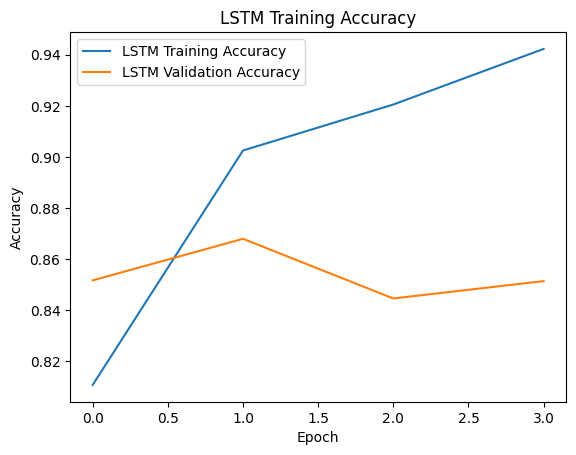

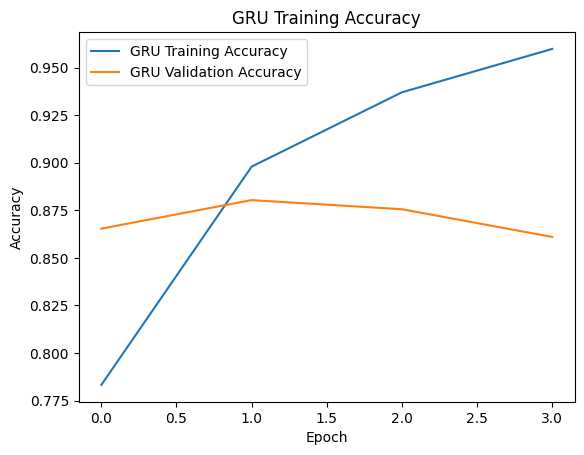

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# Load the IMDB dataset
max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Function to build and train LSTM model
def train_lstm():
    model_lstm = Sequential()
    model_lstm.add(Embedding(max_features, 128))
    model_lstm.add(LSTM(64))
    model_lstm.add(Dense(1, activation='sigmoid'))
    model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history_lstm = model_lstm.fit(x_train, y_train, batch_size=batch_size, epochs=4, validation_data=(x_test, y_test))
    return history_lstm

# Function to build and train GRU model
def train_gru():
    model_gru = Sequential()
    model_gru.add(Embedding(max_features, 128))
    model_gru.add(GRU(64))
    model_gru.add(Dense(1, activation='sigmoid'))
    model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history_gru = model_gru.fit(x_train, y_train, batch_size=batch_size, epochs=4, validation_data=(x_test, y_test))
    return history_gru

# Train LSTM model
history_lstm = train_lstm()

# Train GRU model
history_gru = train_gru()

# Plot training accuracy for LSTM
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('LSTM Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training accuracy for GRU
plt.plot(history_gru.history['accuracy'], label='GRU Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy')
plt.title('GRU Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
